# Statistical foundations of Machine Learning

## INFO-F-422 TP: Maximum likelihood and bootstrapping

Yann-Aël Le Borgne, Fabrizio Carcillo and Gianluca Bontempi

April 18, 2017



## Repetition

### Estimation using the mean square error

Assume to have $N$ observation pairs $(x_i,y_i)$ generated by the following stochastic process

\begin{equation*}
 y_i=\beta_0+\beta_1 x_i +w_i,
\end{equation*}

where the $w_i$ are iid realisations of a random variable $\mathbf{w}$ with mean zero and constant variance $\sigma^2_{\mathbf{w}}$.

The $x_i$ can be seen as *fixed*, the only random component in the sampleset $D_N$ is therefore contained in the $y_i$ (which are random due to the $w_i$).

The coefficients $\beta_0$ and $\beta_1$ can be estimated using the least squares method. This method consists of taking those estimators $\hat{\beta_0}$ and $\hat{\beta_1}$ which minimize

\begin{equation}
 R_{emp}=\sum\limits_{i-1}^N (y_i-\hat{y_i})^2,
\end{equation}

where 

\begin{equation}
 \hat{y_i}=\hat{\beta_0}+\hat{\beta_1}x_i.
\end{equation}

This is equivalent to 

\begin{equation}
 \{\hat{\beta_0},\hat{\beta_1}\}=\arg\min_{b_0,b_1}\sum\limits_{i=1}^N (y_i-b_0-b_1x_i)^2.
\end{equation}

The solution is given by *(Eq. 1)*

\begin{equation}
 \hat{\beta_1}=\frac{S_{xy}}{S_{xx}},\quad \hat{\beta_0}=\bar{y}-\hat{\beta_1}\bar{x},  
\end{equation}

where *(Eq. 2)*

\begin{equation}
 \bar{x}=\frac{\sum_{i=1}^Nx_i}{N},\quad\bar{y}=\frac{\sum_{i=1}^Ny_i}{N},\quad S_{xy}=\sum\limits_{i=1}^N (x_i-\bar{x})y_i,\quad S_{xx}=\sum_{i=1}^N(x_i-\bar{x})^2.
\end{equation}

### Properties of the estimator

* $E_{D_N}[\hat{\beta_1}]=\beta_1$
* $Var[\hat{\beta_1}]=\frac{\sigma^2}{S_{xx}}$
* $E[\hat{\beta_0}]=\beta_0$
* $Var[\hat{\beta_0}]=\sigma^2\left( \frac{1}{N}+\frac{\bar{x}^2}{S_{xx}}\right)$
* $\hat{\sigma}^2_{\mathbf{w}}=\frac{\sum_{i=1}^N(y_i-\hat{y_i})^2}{N-2}$ is a non-biased estimator of $\sigma^2_{\mathbf{w}}$.


### Partitioning the variability

The variability of the response $y_i$ can be expressed as follows

\begin{equation}
 \sum\limits_{i=1}^N(y_i-\bar{y})^2=\sum\limits_{i=1}^N(\hat{y_i}-\bar{y})^2+\sum\limits_{i=1}^N(y_i-\hat{y_i})^2,
\end{equation}

that is

\begin{equation}
 SS_{tot}=SS_{mod}+SS_{res}.
\end{equation}

### The F-test

Goal: test if the variable $y$ is really influenced by the variable $x$. This can be formulated as a hypothesis test $\beta_1=0$. If the test is rejected, it can be deduced that $x$ influences $y$ significantly.

It can be shown that given a normally distributed $\mathbf{w}$: *(Eq. 3)*

\begin{equation}
 \frac{SS_{mod}}{SS_{res}/(N-2)} \sim F_{1,N-2}
\end{equation}

if the hypothesis $\beta_1=0$ is true.

### The t-test

It can be shown that given a normally distributed $\mathbf{w}$:

\begin{equation}
 \hat{\beta_1}\sim \mathcal{N}(\beta_1,\sigma^2 / S_{xx})
\end{equation}

and

\begin{equation}
 \frac{\hat{\beta_1}-\beta_1}{\hat{\sigma}}\sqrt{S_{xx}} \sim \mathcal{T}_{N-2}.
\end{equation}

This can be used for testing the following hypothesis: $\hat{\beta_1}=\beta_1$.

### Confidence intervals

With a probability $1-\alpha$, the true parameter $\beta_1$ lies in the interval *(Eq. 4)*

\begin{equation}
 \hat{\beta_1}\pm t_{\alpha/2,N-2}\cdot \sqrt{\frac{\hat{\sigma}^2}{S_{xx}}}.
\end{equation}

### Variance of the response

Let

\begin{equation}
 \hat{\mathbf{y}}(x)=\hat{\beta_0}+\hat{\beta_1} x.
\end{equation}

We can show that for all $x$:

\begin{equation}
 E_{D_N}[ \hat{\mathbf{y}}(x)]=E_{[y]}[ {\mathbf{y}}(x)]
\end{equation}

and

\begin{equation}
 Var[ \hat{\mathbf{y}}(x)]=\sigma^2\left[\frac{1}{N}+\frac{(x-\bar{x})^2}{S_{xx}}\right].
\end{equation}



## Linear regression exercises

### Exercise 1

Compare with the theoretical part of this course (slide 21 of the chapter [Regression Modelling](http://uv.ulb.ac.be/pluginfile.php/863619/mod_resource/content/1/linregr.pdf)). 

The goal of this exercise is to investigate the link between two variables originating from medical data by studying the *ventricular shortening velocity* in function of *blood glucose*. 


In [36]:
library(ISwR)
data(thuesen)

I <-! is.na(thuesen[,"short.velocity"])
Y<-thuesen[I,"short.velocity"]
X<-thuesen[I,"blood.glucose"]


*(a)*

*  Apply the mean square method "by hand" using equations (Eq. 1) and (Eq. 2) to compute the coefficients $\beta_0$ and $\beta_1$ of a linear model for our data. 


In [37]:
N<-length(Y)
x.bar<-mean(X)
y.bar<-mean(Y)
S.xy<-sum((X-x.bar)*Y)
S.xx<-sum((X-x.bar)^2)
beta.hat.1<-S.xy/S.xx


In [38]:
beta.hat.0<-y.bar-beta.hat.1*x.bar


In [39]:
print(paste("beta.hat.0 = ", beta.hat.0))
print(paste("beta.hat.1 = ", beta.hat.1))


[1] "beta.hat.0 =  1.09781487777238"
[1] "beta.hat.1 =  0.0219625222599968"


*  Test the hypothesis $\beta_1=0$ using an F-test using equation *(Eq. 3)* and the F distribution function `pf` followed by a t-test using equation *(Eq. 4)* and the t distribution function `pt` 


In [40]:
Y.hat<-beta.hat.0+beta.hat.1*X
SS.mod <- sum((Y.hat-mean(Y))^2)
SS.res <- sum((Y-Y.hat)^2)
F.value<-SS.mod/(SS.res/(N-2))
F.pr<-(1-pf(F.value,df1=1,df2=N-2))


In [41]:
print(paste("F-test result: F.value= ",
 F.value))
 print(paste("Pr[F >= F.value]= ", F.pr))


[1] "F-test result: F.value=  4.41401843314627"
[1] "Pr[F >= F.value]=  0.0478959109075709"


In [42]:
var.hat.w<-sum((Y-Y.hat)^2)/(N-2)
beta<-0
t.value<-(beta.hat.1-beta)*sqrt(S.xx)/(sqrt(var.hat.w))
t.pr<-(1-pt(t.value,df=N-2))*2


In [43]:
print(paste("t-test result: t.value= ",t.value))
print(paste("Pr[|T| >= t.value]= ", t.pr))


[1] "t-test result: t.value=  2.10095655194158"
[1] "Pr[|T| >= t.value]=  0.0478959109075709"


*  Compute the confidence interval for $\beta_1$ using equation (Eq. 4) and the function `qt`.


In [44]:
alpha<-0.05
conf.interval.min<-beta.hat.1-qt(alpha/2,df=N-2,lower.tail=FALSE)*sqrt(var.hat.w/S.xx)
conf.interval.max<-beta.hat.1+qt(alpha/2,df=N-2,lower.tail=FALSE)*sqrt(var.hat.w/S.xx)


In [45]:
print(paste("Confidence interval for beta1="))
print(paste("(", conf.interval.min, ",", conf.interval.max, ")"))


[1] "Confidence interval for beta1="
[1] "( 0.000223107746726493 , 0.043701936773267 )"



*  Use the function `lm`(Y$^{\sim}$X) to obtain the same results automatically and compare these with the ones obtained earlier.


In [46]:
summary(lm(Y~X))



Call:
lm(formula = Y ~ X)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40141 -0.14760 -0.02202  0.03001  0.43490 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.09781    0.11748   9.345 6.26e-09 ***
X            0.02196    0.01045   2.101   0.0479 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2167 on 21 degrees of freedom
Multiple R-squared:  0.1737,	Adjusted R-squared:  0.1343 
F-statistic: 4.414 on 1 and 21 DF,  p-value: 0.0479


*  Visualize the data and the regression line


[1] "sigma.hat =  0.216695562262916"


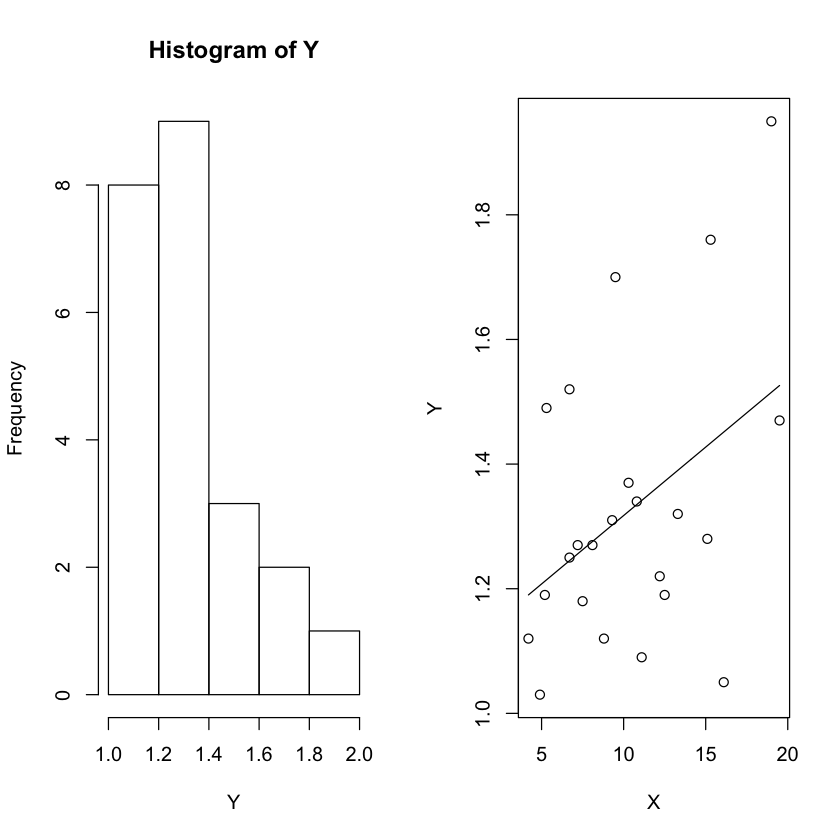

In [47]:
par(mfrow=c(1,2))
#thuesen

hist(Y)
plot(X,Y)
sigma.hat = sqrt( sum( (Y-Y.hat)^2 ) / (N-2) )

print(paste("sigma.hat = ", sigma.hat))
x<-seq(min(X),max(X),by=.1)
lines(x,beta.hat.0+beta.hat.1*x)


### Exercise 2

The goal of this exercise is to experimentally study the bias and the variance of $\hat{\beta_0}$, $\hat{\beta_1}$, $\hat{\sigma}$ and $\hat{\mathbf{y}}(x_i)$. See also the theoretical part of this course (slide 22 of the chapter [Regression Modelling](http://uv.ulb.ac.be/pluginfile.php/863619/mod_resource/content/1/linregr.pdf). 


In [48]:
rm(list=ls())
X<-seq(-10,10,by=1) # the x_i are fixed
beta0<--1 # y_i = -1 + x_i + Normal(0,5)
beta1<-1
sd.w<-5
N<-length(X)
R<-100#00 # number of iterations for the simulation


In [49]:
beta.hat.1<-numeric(R)
beta.hat.0<-numeric(R)
var.hat.w<-numeric(R)
Y.hat<-array(NA,c(R,N))


*(a)*

* Compute $\hat{\beta}_0$, $\hat{\beta}_1$ and $\hat{\sigma}$ and plot their distributions.


In [52]:

x.bar<-mean(X)
S.xx<-sum((X-x.bar)^2)
for (r in 1:R){
  Y<-beta0+beta1*X+rnorm(N,sd=sd.w)
  y.bar<-mean(Y)
  S.xy<-sum((X-x.bar)*Y)

  beta.hat.1[r]<-S.xy/S.xx
  beta.hat.0[r]<-y.bar-beta.hat.1[r]*x.bar

  Y.hat[r,]<-beta.hat.0[r]+beta.hat.1[r]*X
  var.hat.w[r]<-sum((Y-Y.hat[r,])^2)/(N-2)
}

[1] "Theoretical var beta1= 0.0324675324675325 ; Observed = 0.025916983372832"
[1] "Theoretical var beta0= 1.19047619047619 ; Observed = 1.17742384469314"


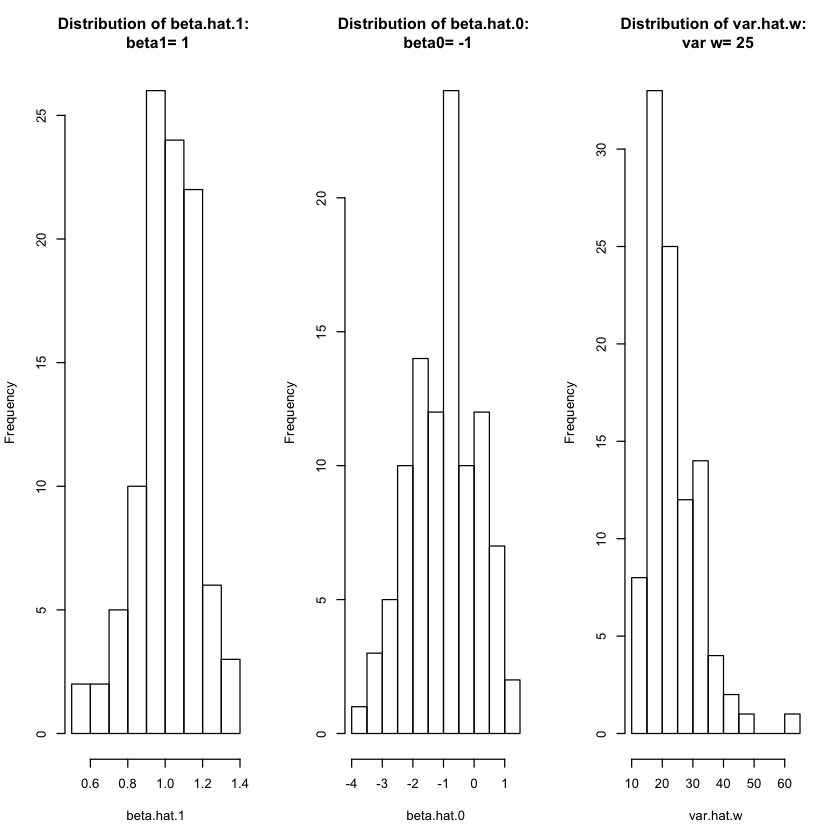

In [55]:
# result for beta_1
par(mfrow=c(1,3))
var.beta.hat.1<-(sd.w^2)/S.xx
print(paste("Theoretical var beta1=", var.beta.hat.1,"; Observed =", var(beta.hat.1) ))
hist(beta.hat.1, main=paste("Distribution of beta.hat.1: \n beta1=", beta1))

# result for beta_0
var.beta.hat.0<-(sd.w^2)*(1/N+(x.bar^2)/S.xx)
print(paste("Theoretical var beta0=", var.beta.hat.0, "; Observed =", var(beta.hat.0) ))
hist(beta.hat.0,main=paste("Distribution of beta.hat.0: \n beta0=",beta0))

# result for sigma_w
hist(var.hat.w,main=paste("Distribution of var.hat.w: \n var w=", sd.w^2))


* Illustrate the theorem $Var[y(x)]=\sigma^2\left(\frac{1}{N}+\frac{(x-\bar{x})^2}{S_{xx}}\right)$.


In [56]:
for (i in 1:5){
  var.y.hat<-var(Y.hat[,i])
  th.var.y.hat<-sd.w^2*(1/N+((X[i]-x.bar)^2)/S.xx)
  print(paste("Theoretical var predic=",th.var.y.hat))
  print(paste( "Observed =",var.y.hat ))
  print("-----------------------------")
}

[1] "Theoretical var predic= 4.43722943722944"
[1] "Observed = 4.19551080722413"
[1] "-----------------------------"
[1] "Theoretical var predic= 3.82034632034632"
[1] "Observed = 3.66044926061554"
[1] "-----------------------------"
[1] "Theoretical var predic= 3.26839826839827"
[1] "Observed = 3.17722168075262"
[1] "-----------------------------"
[1] "Theoretical var predic= 2.78138528138528"
[1] "Observed = 2.74582806763536"
[1] "-----------------------------"
[1] "Theoretical var predic= 2.35930735930736"
[1] "Observed = 2.36626842126376"
[1] "-----------------------------"


## Multiple regression exercise

This example is taken from the theoretical part of this course (slide 31 of the chapter [Regression Modelling](http://uv.ulb.ac.be/pluginfile.php/863619/mod_resource/content/1/linregr.pdf)).

Mutiple linear dependence occurs when the variable $x$ is a vector instead of a scalar. The goal of this exercise is to verify the theoretical results for the estimators $\hat{\mathbf{\sigma}}^2$ and $\hat{\mathbf{\beta} }$ obtained for the least squares method (no bias and analytical results concerning $Var[\hat{\mathbf{\beta}}]$).


In [58]:
rm(list=ls())
library(MASS)

# initial values for n, (sigma_w) and beta
n<-3 # number of input variables
p<-n+1
beta<-seq(2,p+1) # beta =(2,3,...,n+2)
sd.w<-5  

# generating data D_N
N<-100 # number of samples
X<-array(runif(N*n,min=-20,max=20),c(N,n))
X<-cbind(array(1,c(N,1)),X)


R<-100#00 # number of iterations
beta.hat<-array(0,c(p,R))
var.hat.w<-numeric(R)
Y.hat<-array(NA,c(R,N))

*(a)*

* Compute $\hat{Y}$, $\hat{\beta}$ and $\hat{\sigma}$ following the equations in the course slides 34 and 41.


In [74]:
# computation beta, Y and sigma_w
for (r in 1:R){
  Y<-X%*%beta+rnorm(N,sd=sd.w)
 
  beta.hat[,r]<-ginv(t(X)%*%X)%*%t(X)%*%Y

  Y.hat[r,]<-X%*%beta.hat[,r]
  e<-Y-Y.hat[r,]
  var.hat.w[r]<-(t(e)%*%e)/(N-p)
}


* Plot the histograms for $\hat{\sigma}$ and for each $\hat{\beta}$


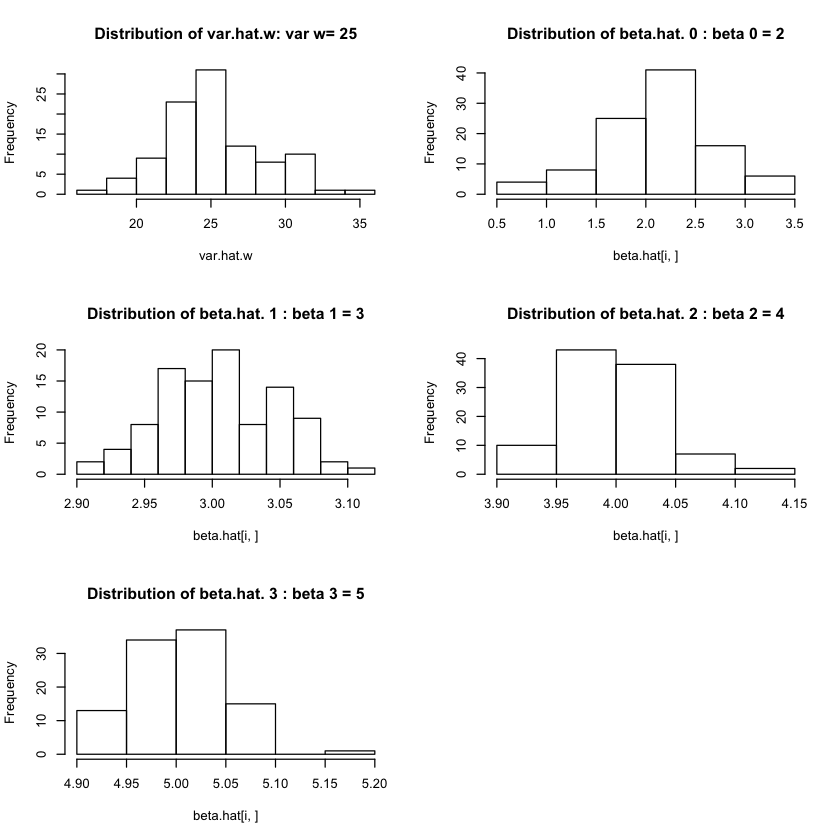

In [60]:
par(mfrow=c(3,2))
hist(var.hat.w,main=paste("Distribution of var.hat.w: var w=", sd.w^2))
for (i in 1:p){
  hist(beta.hat[i,], main=paste("Distribution of beta.hat.",i-1,": beta",i-1,"=", beta[i]))
}


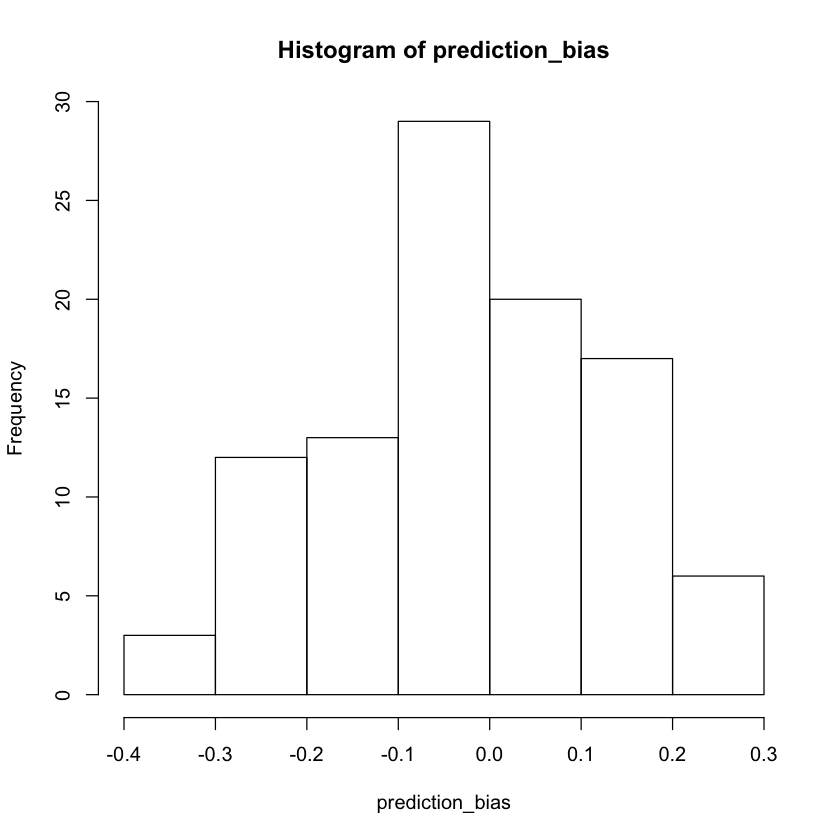

In [84]:
#Histograms of the prediction bias 
prediction_bias<-apply(Y.hat,2,mean)-X%*%beta
hist(prediction_bias)

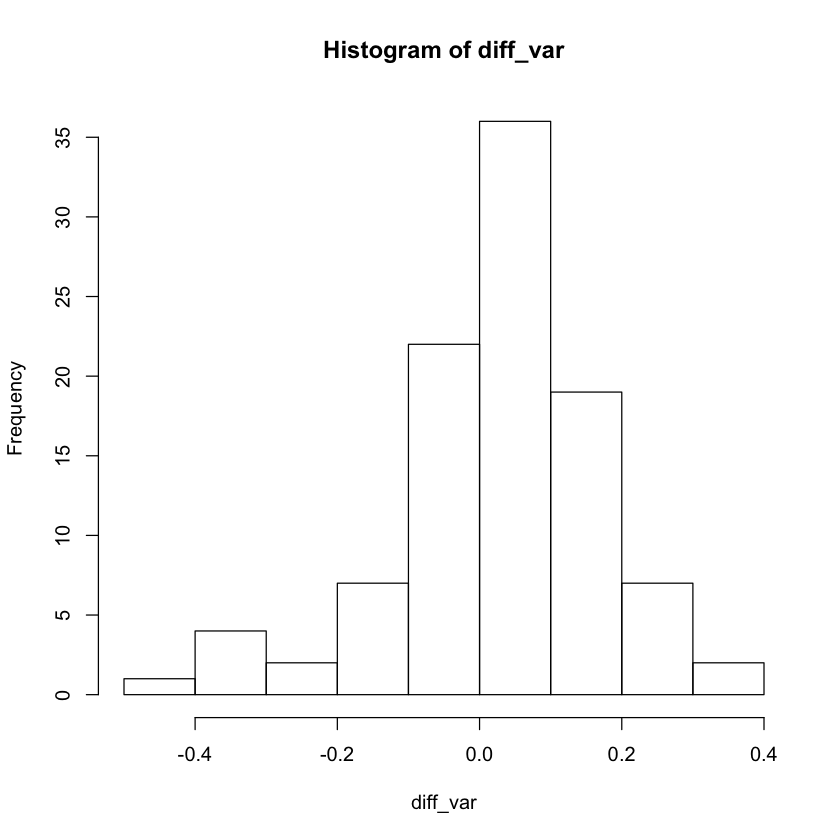

In [82]:
# comparison of analytic variance and that of the simulated prediction
diff_var<-numeric(N)
for (i in 1:N){
  diff_var[i]=var(Y.hat[,i])-sd.w^2*(t(X[i,])%*%ginv(t(X)%*%X)%*%X[i,])
}
hist(diff_var)